# ENCODING 

### ASCII

In [154]:
ords =  [99, 114, 121, 112, 116, 111, 123, 65, 83, 67, 73, 73, 95, 112, 114, 49, 110, 116, 52, 98, 108, 51, 125]
''.join([chr(i) for i in ords])


'crypto{ASCII_pr1nt4bl3}'

### Hex

In [155]:
bytes.fromhex('63727970746f7b596f755f77696c6c5f62655f776f726b696e675f776974685f6865785f737472696e67735f615f6c6f747d')


b'crypto{You_will_be_working_with_hex_strings_a_lot}'

### Base64

In [162]:
import base64 
base64.b64encode(bytes.fromhex('72bca9b68fc16ac7beeb8f849dca1d8a783e8acf9679bf9269f7bf'))

b'crypto/Base+64+Encoding+is+Web+Safe/'

### Bytes and Big Integers

In [164]:
from Cryptodome.Util.number import long_to_bytes

i = 11515195063862318899931685488813747395775516287289682636499965282714637259206269

long_to_bytes(i)

b'crypto{3nc0d1n6_4ll_7h3_w4y_d0wn}'

### Encoding challenge

In [153]:
import telnetlib
import json
import base64


def utf8_decode(s): 
    utf8b = bytes(s)
    return utf8b.decode('utf-8')

def hex_decode(s): 
    return bytes.fromhex(s).decode('utf-8') 
     

def rot13_decode(s):
    result = []
    for i in s: 
        
        if i!='_':
            result.append(chr( (ord(i) - ord('a') + 13) %26 + ord('a')))
        else: 
            result.append('_')


    return ''.join(result)
 
def base64_decode(s): 
    return base64.b64decode(s).decode('utf-8')

def bigint_decode(s): 
    return hex_decode(s[2:])


ENCODINGS = {
    "base64": base64_decode,
    "hex": hex_decode, 
    "rot13": rot13_decode,
    "bigint": bigint_decode, 
    "utf-8": utf8_decode,
}

HOST = "socket.cryptohack.org"
PORT = 13377



tn = telnetlib.Telnet(HOST, PORT)

def readline():
    return tn.read_until(b"\n")

def json_recv():
    line = readline()
    return json.loads(line.decode())

def json_send(hsh):
    request = json.dumps(hsh).encode()
    tn.write(request)


while True:  
    received = json_recv()

    if 'flag' in received: 
        print(received["flag"])
        break 

    result = ENCODINGS[received["type"]](received["encoded"])

    to_send = {
        "decoded": result
    }
    json_send(to_send)


crypto{3nc0d3_d3c0d3_3nc0d3}


# XOR 

### XOR Starter

In [170]:
import numpy as np 

str = 'label'

print('crypto{'+''.join([chr(i) for i in [ord(s)^13 for s in str]])+'}')

crypto{aloha}


### XOR Properties

In [172]:
from Cryptodome.Util.number import bytes_to_long, long_to_bytes

def h2i(h):
    return bytes_to_long(bytes.fromhex(h)) 

KEY1 = 'a6c8b6733c9b22de7bc0253266a3867df55acde8635e19c73313'
KEY2_KEY1 = '37dcb292030faa90d07eec17e3b1c6d8daf94c35d4c9191a5e1e'
KEY2_KEY3 = 'c1545756687e7573db23aa1c3452a098b71a7fbf0fddddde5fc1'
FLAG_KEY1_KEY3_KEY2 = '04ee9855208a2cd59091d04767ae47963170d1660df7f56f5faf' 

FLAG = long_to_bytes(h2i(FLAG_KEY1_KEY3_KEY2) ^ h2i(KEY1) ^ h2i(KEY2_KEY3))
print(FLAG)

b'crypto{x0r_i5_ass0c1at1v3}'


### Favourite byte 

In [178]:
from Cryptodome.Util.number import bytes_to_long, long_to_bytes

def h2i(h):
    return bytes_to_long(bytes.fromhex(h)) 


hex = '73626960647f6b206821204f21254f7d694f7624662065622127234f726927756d'
for g in range(0,255+1):
    guess = ''
    for i in range(2,len(hex)+2,2): 
        guess += long_to_bytes(h2i(hex[i-2:i])^g).decode('ascii',errors='ignore')
  
    if 'crypto{' in guess: 
        print(guess)
    

crypto{0x10_15_my_f4v0ur173_by7e}


### You either know, XOR you don't

In [175]:
from itertools import cycle

def xor_lower(x,y): 
    return [i^j for (i,j) in zip(x,y)]

def xor_longer(x,y): 
    
    return [i^j for (i,j) in zip(x,cycle(y))]

c = '0e0b213f26041e480b26217f27342e175d0e070a3c5b103e2526217f27342e175d0e077e263451150104'

format  = b'crypto{'
k = ''.join( chr(r) for r in xor_lower(bytes.fromhex(c),format))+'y'
print(k)
m= ''.join( chr(r) for r in xor_longer(bytes.fromhex(c),bytes(k,'ascii')))
print(m)

myXORkey
crypto{1f_y0u_Kn0w_En0uGH_y0u_Kn0w_1t_4ll}


### Lemur XOR

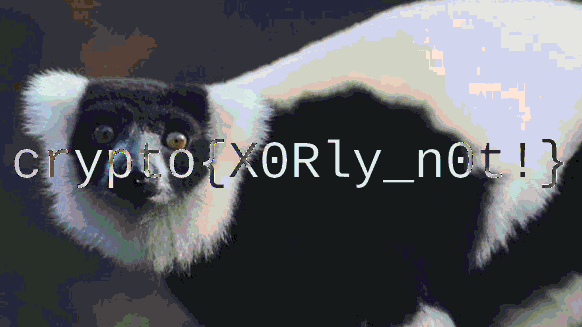

In [27]:
from PIL import Image 
import numpy as np 

from IPython.display import display


lemur = Image.open("lemur.png")
flag = Image.open("flag.png")

lemurp = np.array(lemur) 
flagp = np.array(flag)

r = np.bitwise_xor(lemurp,flagp)

display(Image.fromarray(r))

# MATHEMATICS

### Greatest common divisior 

In [38]:
def gcd(a,b):
    if b == 0: 
        return a
    return gcd(b,a%b)

gcd(66528,52920)

1512

###  Extended GCD

In [39]:
def extended_gcd(a,b):
    u = 1 
    g = a 
    x = 0 
    y = b 
    
    while y != 0: 
        q = g//y 
        t = g%y 
        
        s = u - q*x 
        u = x
        x = s
        
        g = y 
        y = t 
        
    
    v = (g-a*u)//b 
    
    return g,u,v 

extended_gcd(26513,32321)


(1, 10245, -8404)

### Modular arithmetic 1

In [40]:
x = 11%6
y = 8146798528947%17
min(x,y)

4

### Modular arthimetic 2

From Fermat's little theorem $a^{p-1} \equiv 1 \bmod(p)$

Since $p = 65537$. Calculating $273246787654^{65536} (\bmod 65537) $ will yield $1$

### Modular inverse

$a^{p-1} \equiv 1 (\bmod p)$

$a^{p-2+1} \equiv 1 (\bmod p)$

$a^{p-2} \equiv a^{-1} (\bmod p)$

In [41]:
def inv(a,p):
    return a**(p-2)%p 

inv(3,13)

9